In [17]:
library(BDP2)
options(repr.plot.width=8, repr.plot.height=3)

In [5]:
p0=0.3              # historical response rate
p1=0.5              # desired response rate of alternative

pF=p1               # = p1
pE=p0               # = p0; pE usually < pF
avg_pEpF = (pE + pF)/2.0

# Param values suggested by paper
# "for the futility evaluation, choose a beta prior with mean pF , whereas 
#  for the efficacy evaluation, choose a beta prior with mean pE"
shape1F=pF          # = p_F
shape2F=1-shape1F   # = 1 - p_F
shape1E=pE          # = p_E
shape2E=1-shape1E   # = 1 - p_E

Loading required package: ggplot2


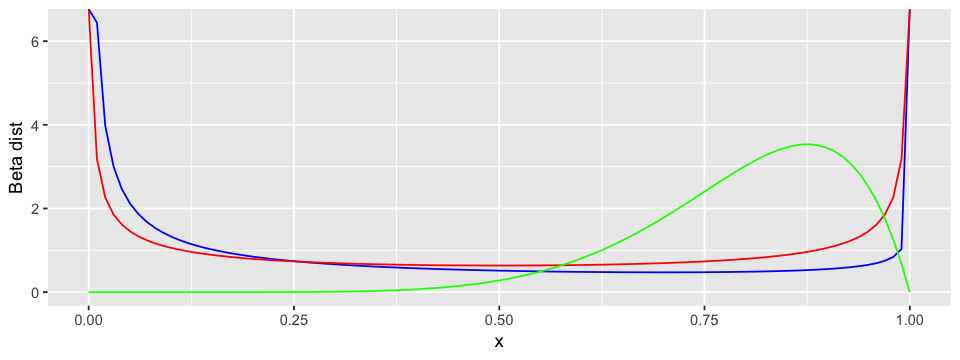

In [6]:
require(ggplot2)
x <- seq(0,1,length=100)
dbE <- dbeta(x, shape1E, shape2E)
dbF <- dbeta(x, shape1F, shape2F)
#qplot(x, db, geom="line")

p = qplot() + 
  geom_line(aes(x = x, y = dbE), color = "blue") +
  geom_line(aes(x = x, y = dbF), color = "red") +
  geom_line(aes(x = x, y = dbeta(x,8,2)), color = "green") +
  xlab('x') +
  ylab('Beta dist')

print(p)

Now, to determine $c_E$ and $c_F$

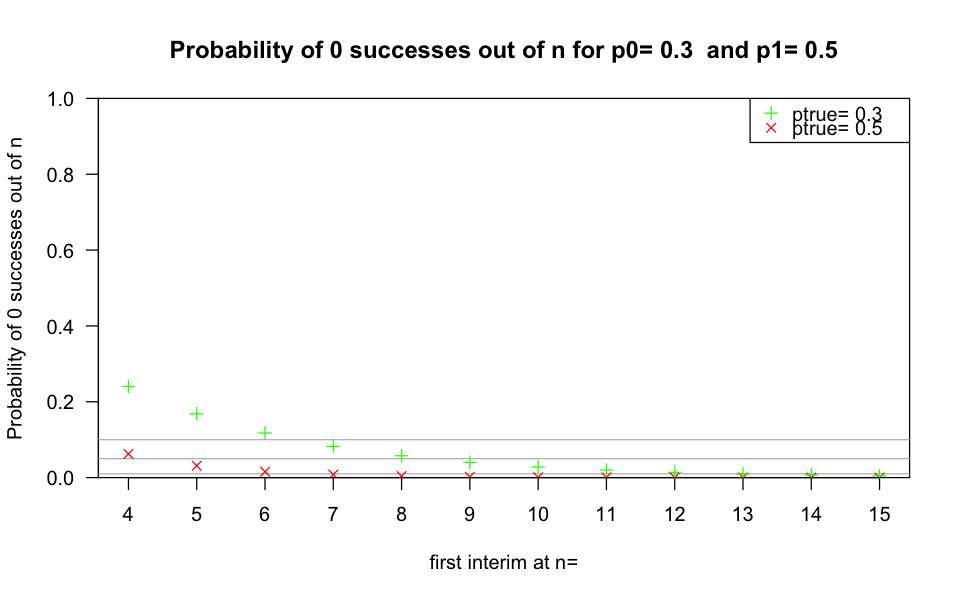

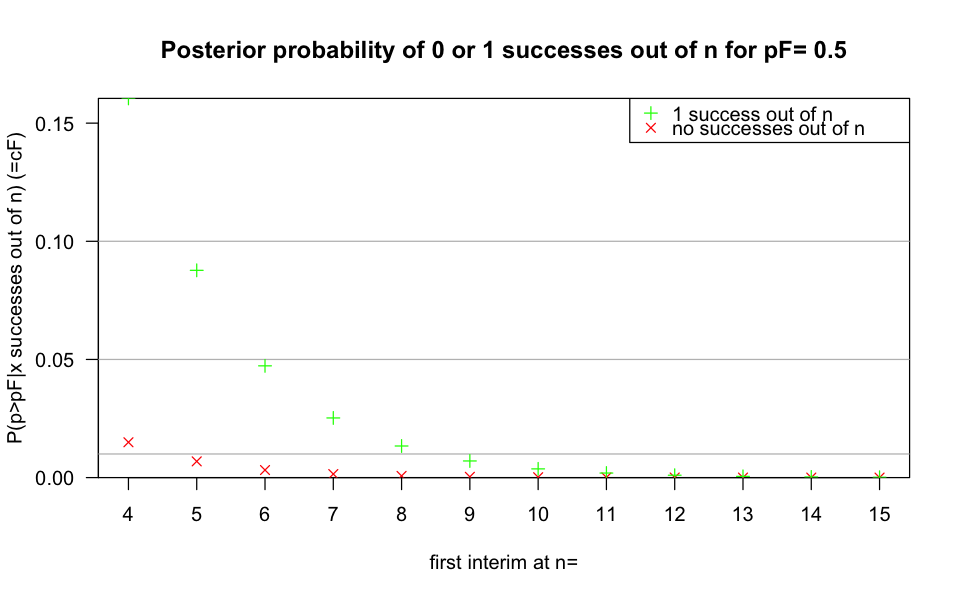

In [7]:
nmin=4
nmax=15

options(repr.plot.width=8, repr.plot.height=5)
plotBDP2(x="n",y="Prob0Successes",n=c(nmin,nmax),p0=p0,p1=p1)


plotBDP2(x="n",y="PostProb0or1Successes",n=c(nmin,nmax),pF=pF,shape1F=shape1F,shape2F=shape2F)

From the above graphs, can set $c_F = 0.01$ for interim checking point of 6 patients.

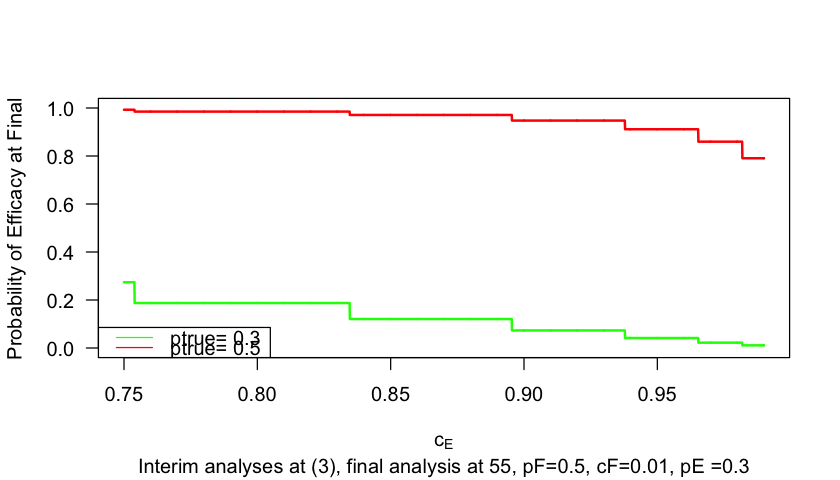

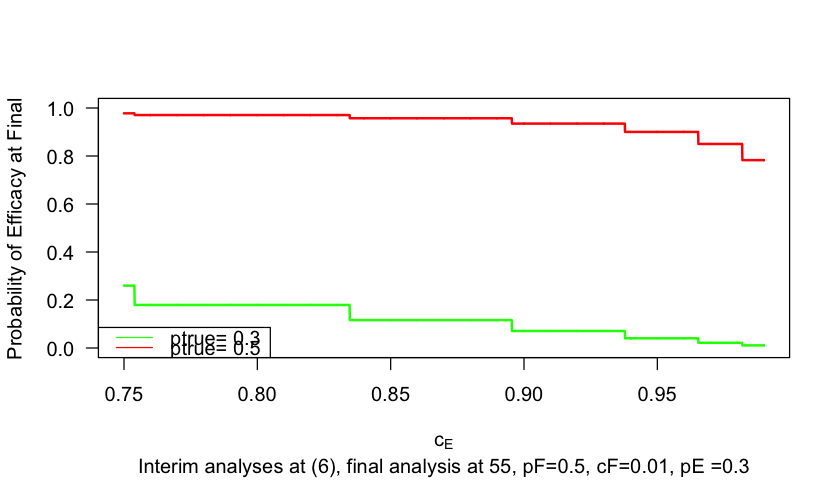

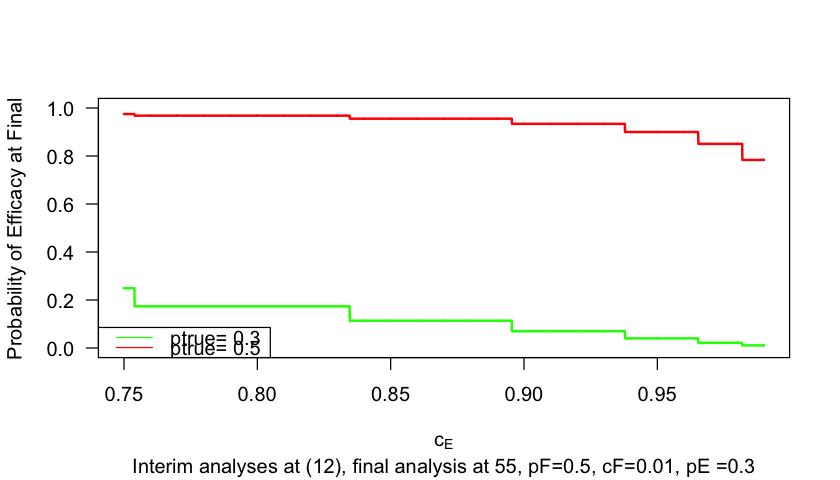

In [8]:
cF = 0.01
n=55
interim.at = 6

cE=c(7500:9900)/10000

options(repr.plot.width=7, repr.plot.height=4)

plotBDP2(x = "cE", 
         y = "PEcall", 
         n=n, interim.at=3, p0=p0,p1=p1,
         pF=pF,cF=cF,pE=pE,cE=cE,
         shape1F=shape1F,shape2F=shape2F,shape1E=shape1E,shape2E=shape2E, 
         col = c("green", "red"))

plotBDP2(x = "cE", 
         y = "PEcall", 
         n=n, interim.at=interim.at, p0=p0,p1=p1,
         pF=pF,cF=cF,pE=pE,cE=cE,
         shape1F=shape1F,shape2F=shape2F,shape1E=shape1E,shape2E=shape2E, 
         col = c("green", "red"))

plotBDP2(x = "cE", 
         y = "PEcall", 
         n=n, interim.at=12, p0=p0,p1=p1,
         pF=pF,cF=cF,pE=pE,cE=cE,
         shape1F=shape1F,shape2F=shape2F,shape1E=shape1E,shape2E=shape2E, 
         col = c("green", "red"))

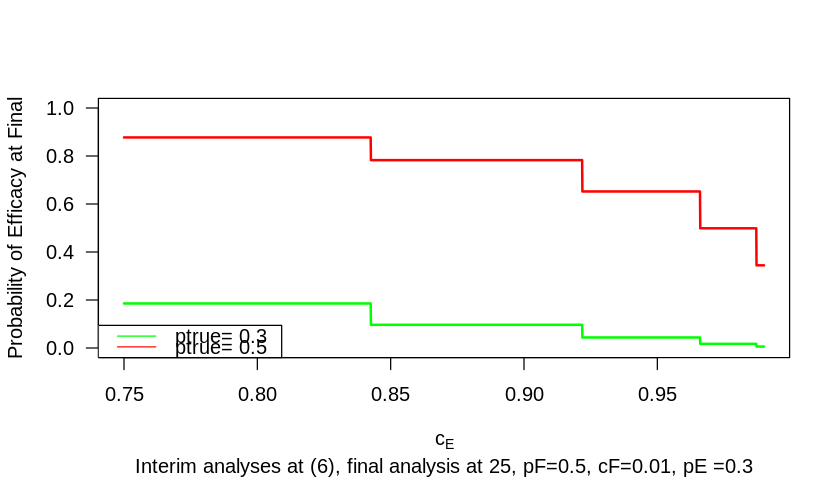

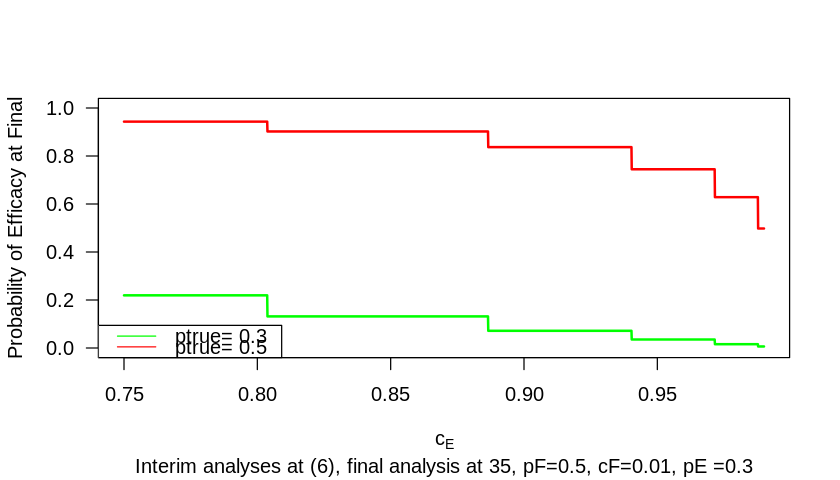

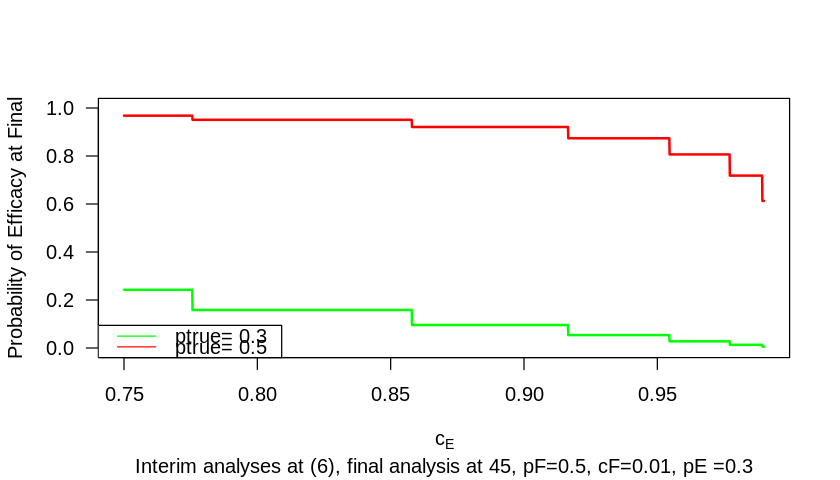

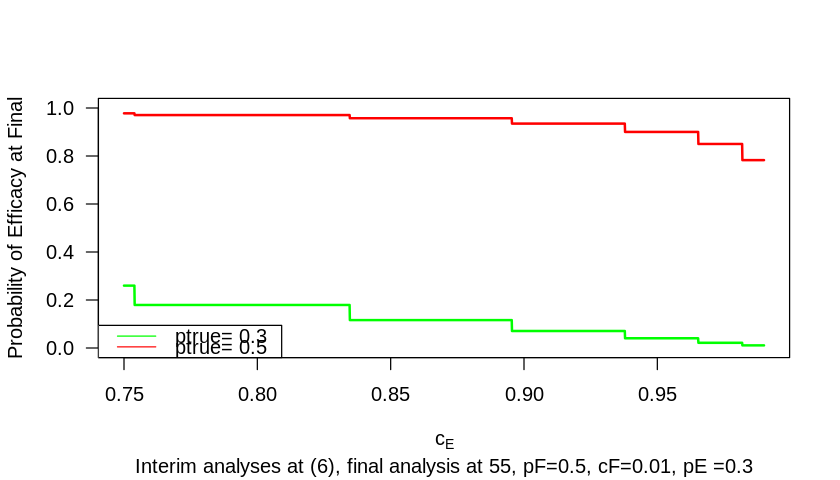

In [6]:
plotBDP2(x = "cE", 
         y = "PEcall", 
         n=25, interim.at=interim.at, p0=p0,p1=p1,
         pF=pF,cF=cF,pE=pE,cE=cE,
         shape1F=shape1F,shape2F=shape2F,shape1E=shape1E,shape2E=shape2E, 
         col = c("green", "red"))

plotBDP2(x = "cE", 
         y = "PEcall", 
         n=35, interim.at=interim.at, p0=p0,p1=p1,
         pF=pF,cF=cF,pE=pE,cE=cE,
         shape1F=shape1F,shape2F=shape2F,shape1E=shape1E,shape2E=shape2E, 
         col = c("green", "red"))

plotBDP2(x = "cE", 
         y = "PEcall", 
         n=45, interim.at=interim.at, p0=p0,p1=p1,
         pF=pF,cF=cF,pE=pE,cE=cE,
         shape1F=shape1F,shape2F=shape2F,shape1E=shape1E,shape2E=shape2E, 
         col = c("green", "red"))

plotBDP2(x = "cE", 
         y = "PEcall", 
         n=n, interim.at=interim.at, p0=p0,p1=p1,
         pF=pF,cF=cF,pE=pE,cE=cE,
         shape1F=shape1F,shape2F=shape2F,shape1E=shape1E,shape2E=shape2E, 
         col = c("green", "red"))

For $n_f=55$, $c_F=0.01$, interim checks at 6, $c_E=0.9$ gives type I error rate of $\sim 0.1$ and power of $\sim 0.9$

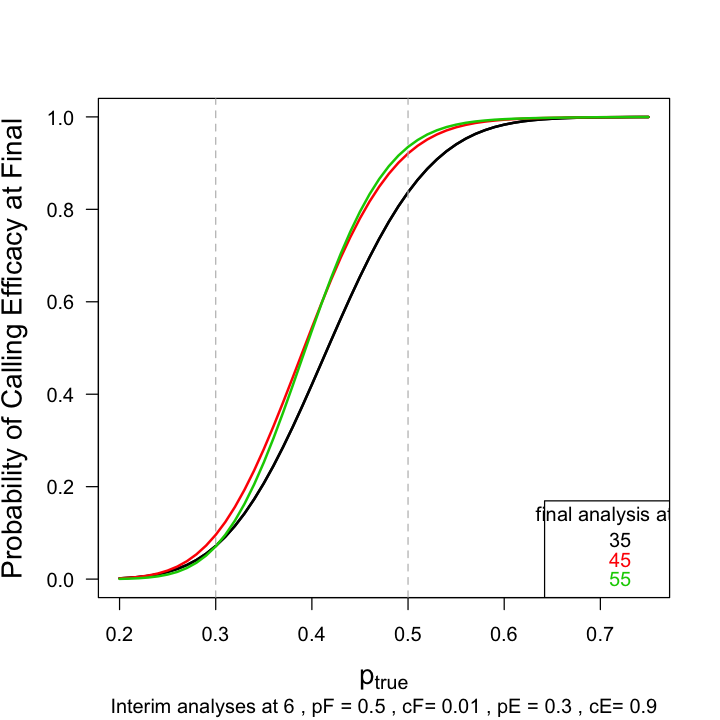

In [9]:
n=55
cE=0.9
cF=0.01

interim.at=6
#ptrue=c(0:40)/100
pvec=seq(0.20, 0.75, by=0.01)

options(repr.plot.width=6, repr.plot.height=6)
plotBDP2(x = "ptrue", y = "PEcall", 
         n=35, interim.at=interim.at, ptrue=pvec, 
         pF=pF, cF=cF, pE=pE, cE=cE, p0=p0, p1=p1,
         shape1F=shape1F, shape2F=shape2F, shape1E=shape1E , shape2E=shape2E,col=1,cex.lab=1.4)

#plotBDP2(x="ptrue",y="PEcall",n=n,interim.at=vn.int,pF=pF,cF=cF,pE=pE,cE=cE,ptrue=pvec,
#         shape1F=shape1F,shape2F=shape2F,shape1E=shape1E,shape2E=shape2E,col=1,cex.lab=1.4)

#other curves for other final N
nvec=c(35,45,55)
interims.at= 6
for (jj in 1:length(nvec)) {
  njj=nvec[jj]
  # vn.int=seq(0,n,by=input$interim.atEvery)[-1]
  # vn.int=vn.int[-length(vn.int)]
  vn.int=interims.at[interims.at<n]
  plotBDP2(x="ptrue",y="PEcall",n=njj,interim.at=vn.int,pF=pF,cF=cF,pE=pE,cE=cE,ptrue=pvec,
           shape1F=shape1F,shape2F=shape2F,shape1E=shape1E,shape2E=shape2E,add=TRUE,col=jj)
}
abline(v=p0,col="grey",lty=2)
abline(v=p1,col="grey",lty=2)
legend("bottomright",title="final analysis at ",legend=nvec,text.col = 1:length(nvec))

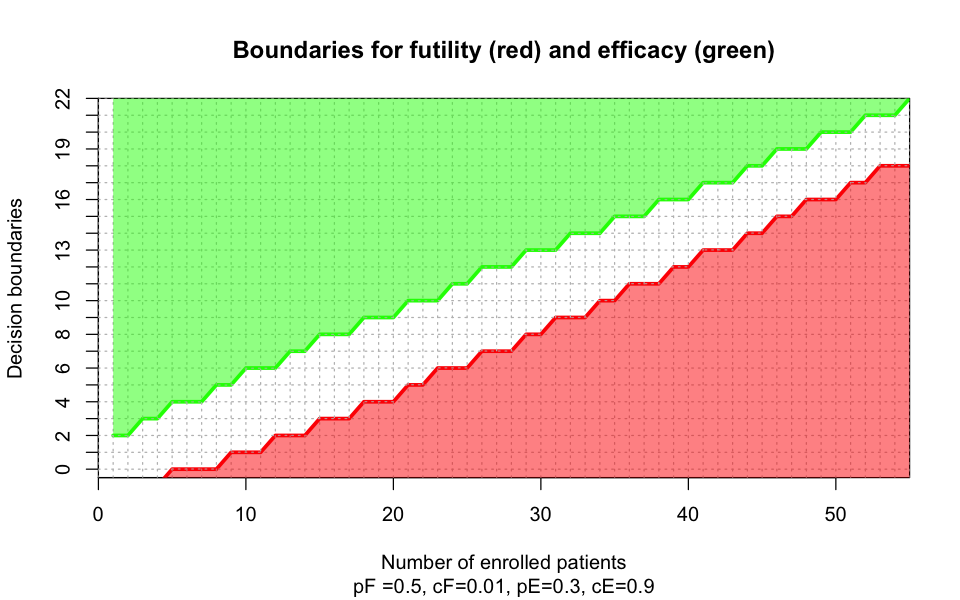

In [15]:
options(repr.plot.width=8, repr.plot.height=5)

plotBDP2(x = "n", 
         y = "bFbE", 
         n=n,pF=pF,cF=cF,pE=pE,cE=cE,
         shape1F=shape1F,shape2F=shape2F,shape1E=shape1E,shape2E=shape2E,
         col=c("red","green"))

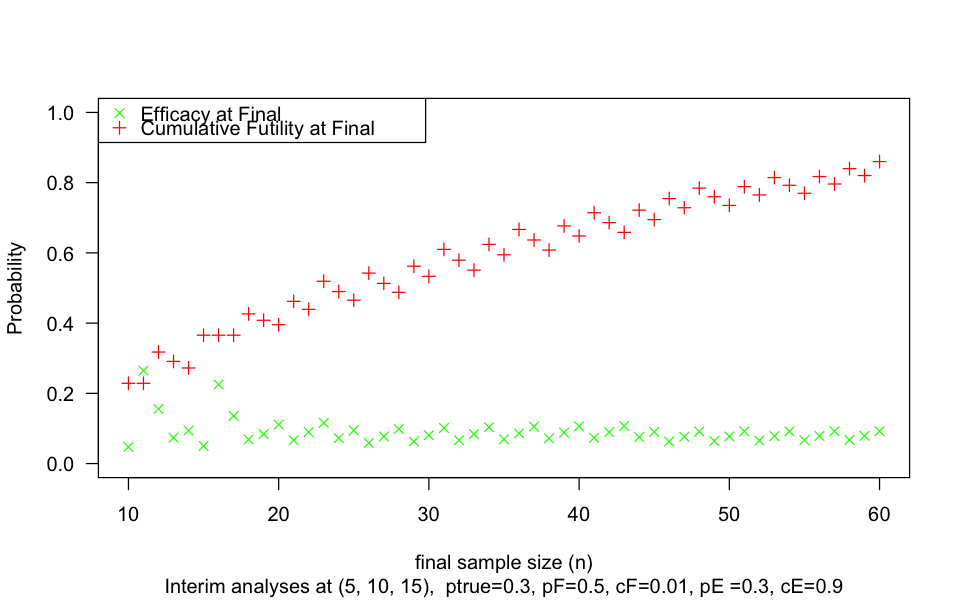

In [12]:
nvec=c(10:60)
int.at=c(5,10,15)
plotBDP2(x="n", y="PFstopEcall",
         n =nvec, interim.at = int.at,
         pF=pF,cF=cF,pE=pE,cE=cE,ptrue=p0,shape1F=shape1F,shape2F=shape2F,shape1E=shape1E,shape2E=shape2E)

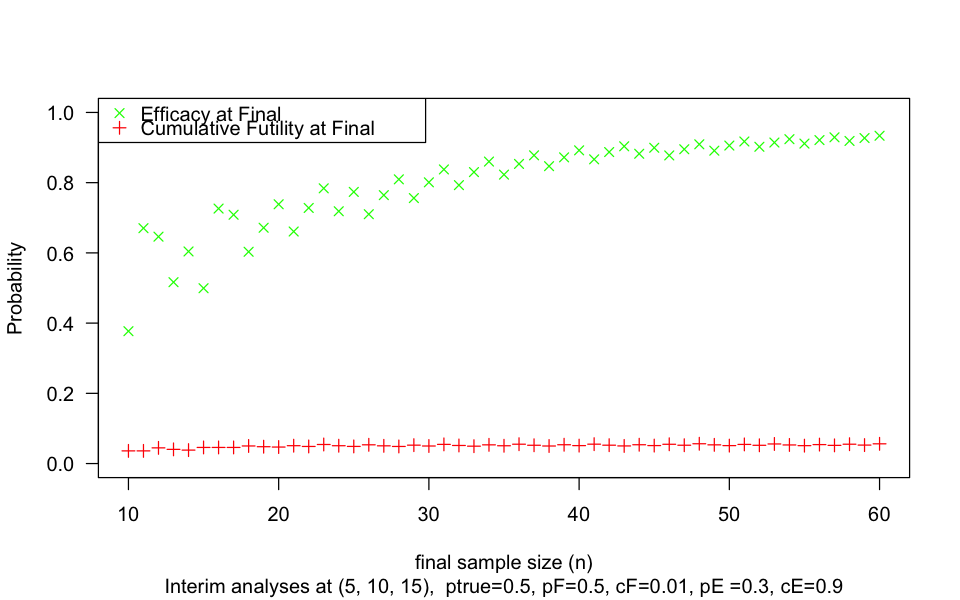

In [13]:
plotBDP2(x="n", y="PFstopEcall",
         n =nvec, interim.at = int.at,
         pF=pF,cF=cF,pE=pE,cE=cE,ptrue=p1,shape1F=shape1F,shape2F=shape2F,shape1E=shape1E,shape2E=shape2E)

[[1]]
[1] 6

[[1]]
[1] 6

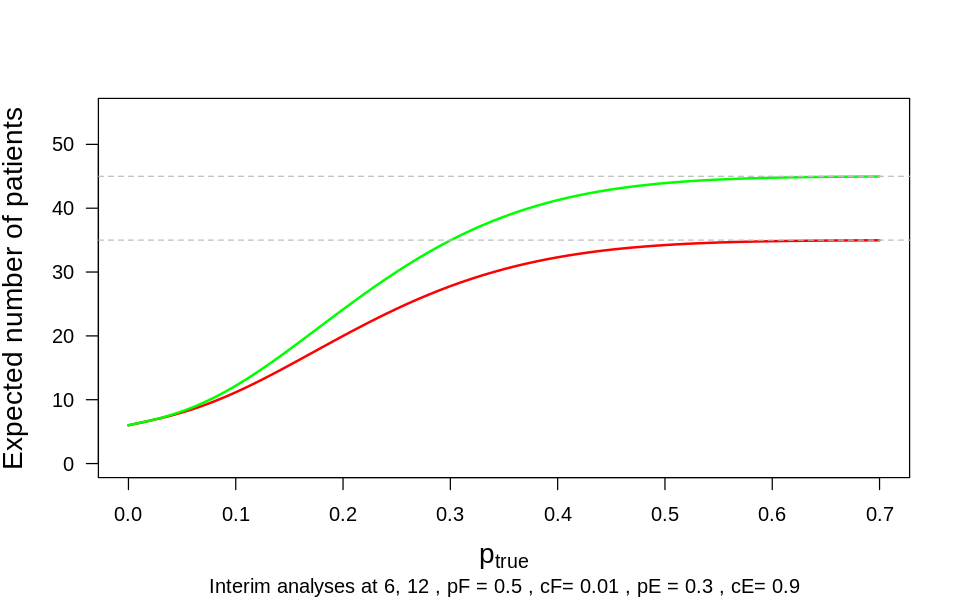

In [11]:
n1 = 35
int.at=c(6,12)
pvec=c(0:70)/100
int.at=int.at[int.at<n1]
plotBDP2(x="ptrue", y="ExpectedNumber",
         n=n1,interim.at=int.at,pF=pF,cF=cF,pE=pE,cE=cE,ptrue=pvec,
         shape1F=shape1F,shape2F=shape2F,col="red",ylim=c(0,n),cex.lab=1.4)

n2=45
int.at=int.at[int.at<n2]
plotBDP2(x="ptrue", y="ExpectedNumber",
         n=n2,interim.at=int.at,pF=pF,cF=cF,pE=pE,cE=cE,ptrue=pvec,
         shape1F=shape1F,shape2F=shape2F,col="green",add=TRUE)

abline(h=n1,col="grey",lty=2)
abline(h=n2,col="grey",lty=2)

#### Prior sensitivity

In [4]:
print(avg_pEpF)
shape1F1=avg_pEpF          # = p_F
shape2F1=1-shape1F1   # = 1 - p_F
shape1E1=avg_pEpF          # = p_E
shape2E1=1-shape1E1   # = 1 - p_E

plotBDP2(x = "n", 
         y = "bFbE", 
         n=n,pF=pF,cF=cF,pE=pE,cE=cE,
         shape1F=shape1F1,shape2F=shape2F1,shape1E=shape1E1,shape2E=shape2E1,
         col=c("red","green"))

ERROR: Error in print(avg_pEpF): object 'avg_pEpF' not found


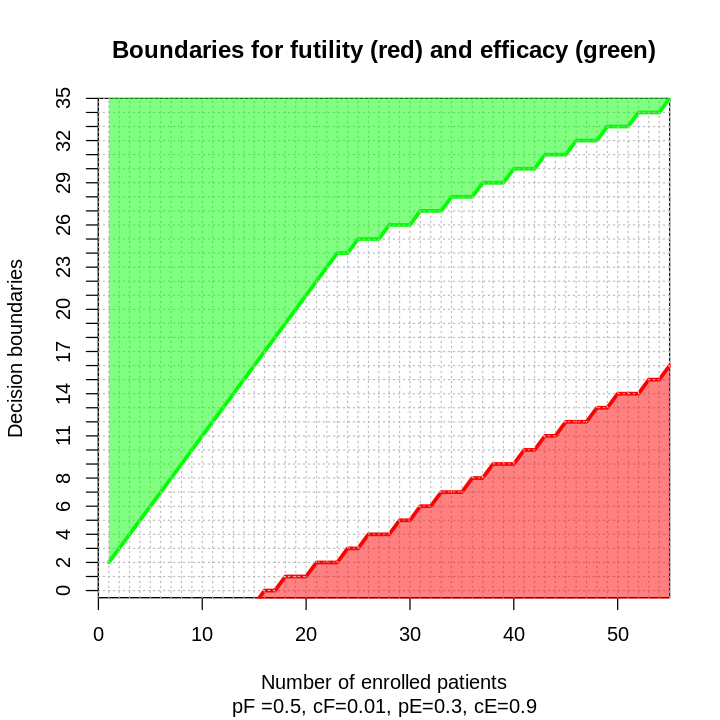

In [68]:
         col=c("red","green"))

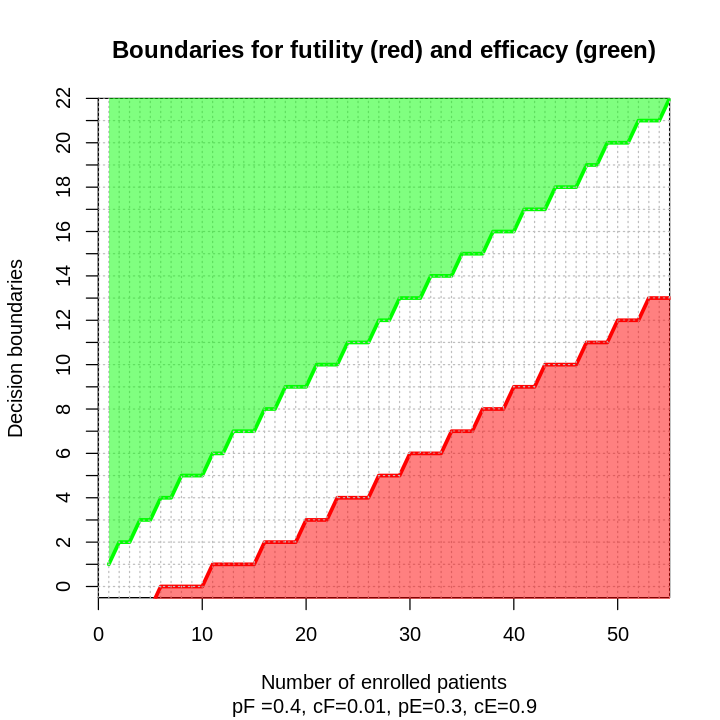

In [75]:
plotBDP2(x = "n", 
         y = "bFbE", 
         n=55,pF=0.4,cF=0.01,pE=0.3,cE=0.90,
         shape1F=0.4,shape2F=0.6,shape1E=0.001,shape2E=0.001,
         col=c("red","green"))

In [28]:
print(c(p0,p1,pF,pE,cF,cE,shape1E,shape2E,shape1F,shape2F,n,interim.at))

# Operating characteristics with calling for efficacy
BDP2(n=55, interim.at = c(6,12,18,24,33,42), ptrue = p1,
     eff.stop = "call",
     pF=pF, cF=cF, pE=pE, cE =cE,
     type="PostProb",
     shape1F=shape1F, shape2F=shape2F, shape1E=shape1E, shape2E=shape2E)

 [1]  0.30  0.50  0.50  0.30  0.01  0.90  0.30  0.70  0.50  0.50 55.00  6.00
  Int.Analysis Pat.number Crit.boundaryE P.effic Crit.boundaryF P.futil
1            1          6              4  0.3437              0  0.0156
2            2         12              6  0.6125              2  0.0139
3            3         18              9  0.5916              4  0.0072
4            4         24             11  0.7247              6  0.0038
5            5         33             14  0.8386              9  0.0021
6            6         42             17  0.8956             13  0.0039
7            7         55             22  0.9179             18  0.0023
  P.futil.cum
1      0.0156
2      0.0295
3      0.0367
4      0.0405
5      0.0426
6      0.0465
7      0.0488

Expected number of patients enrolled in the trial: 53.16
Estimated probability of inconclusive results                   : 0.0333

In [76]:
print(c(p0,p1,pF,pE,cF,cE,shape1E,shape2E,shape1F,shape2F,n,interim.at))
# Operating characteristics with stopping for efficacy
BDP2(n=n, interim.at = c(12,24,36,48), ptrue = 0.4,
     eff.stop = "stop",
     pF=0.3, cF=0.01, pE=0.5, cE=0.90,
     type="PredictivePower", simulate=TRUE, alpha=0.025, nsim=5,
     shape1F=shape1F, shape2F=shape2F, shape1E=shape1E, shape2E=shape2E)

 [1]  0.30  0.50  0.50  0.30  0.01  0.90  0.30  0.70  0.50  0.50 55.00  6.00

Exact power of the test used in the final analysis:   0.8596951 

#######################################################################

Simulation results (Operating Characteristics of the design):


Critical boundaries for declaring efficacy/futility and corresponding
probabilites.

Efficacy is declared if the number of responses at an interim analysis is
>= the critical boundary Crit.BoundaryE.
Futility is declared if the number of responses at an interim analysis is
<= the critical boundary Crit.BoundaryF.
The last row corresponds to the final analysis.

  Int.Analysis Pat.number Crit.boundaryE P.effic P.effic.cum Crit.boundaryF
1            1         12              8     0.2         0.0              1
2            2         24             13     0.2         0.0              6
3            3         36             18     0.2         0.2             11
4            4         48             23     0.2   

In [82]:
BDP2_simulate(n, vn.int = c(12,24,36,48),0.5,0.3, 0.5, alpha=0.05,crit=1,nsim=5)



#######################################################################

Futility analysis based on the posterior probability of
success rate >= p1

#######################################################################

Simulation results (Operating Characteristics of the design):


Critical boundaries for early stopping and probabilities of early stopping.
The recruitment stops if the number of successes at an interim analysis
is <= the critical boundary.
The last row corresponds to the final analysis
(in case of statistical testing: non-rejection of H0).

  Int.Analysis Pat.number Crit.boundary P.stop P.stop.cum
1            1         12            12      1          1
2            2         24            24      0          1
3            3         36            36      0          1
4            4         48            48      0          1
5            5         55            54      0          1

Expected number of patients enrolled in the trial   : 12 

